In [215]:
import tensorflow as tf
import imageio
import natsort
import glob
import PIL
import IPython
import numpy as np
import matplotlib.pyplot as plt
from model import CVAE
import train
from tensorflow_probability import distributions as tfd
from dataset import preprocess_images
from tensorflow.linalg import matvec
from tensorflow_addons.image import rotate
import os
import random

In [216]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./beta_VAE/image/2_23/method3/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [217]:
def generate_and_save_images(predictions, degree, dire):
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
    file_dir = './image/'+ dire
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    plt.savefig(file_dir +'/image_at_epoch_{:04d}.png'.format(degree))
    plt.close()


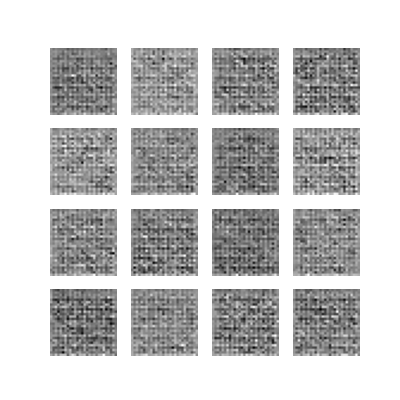

In [218]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [220]:
model = CVAE(latent_dim=32, beta=3)
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.restore("./beta_VAE/checkpoints/2_23/method3/ckpt-10")

In [221]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
test_images = preprocess_images(test_images)

In [222]:
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(10000).batch(32))

num_examples_to_generate = 16

In [223]:
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [224]:
def generate_images(model, data):
    fig = plt.figure(figsize=(4, 4))
    for i in range(data.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(data[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

# original image

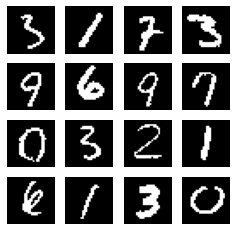

In [225]:
generate_images(model, test_sample)

# After Model translate

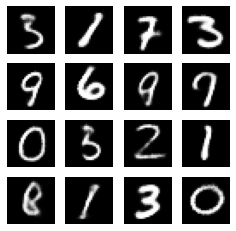

In [226]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
generate_images(model, predictions)

In [227]:
mean, logvar = model.encode(test_sample)
r_m = np.identity(model.latent_dim)
z = model.reparameterize(mean, logvar)
for i in range (10, 120, 10):  
    theta = np.radians(i)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.decode(rota_z)
    generate_and_save_images(phi_z, i, 'test1')

In [228]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


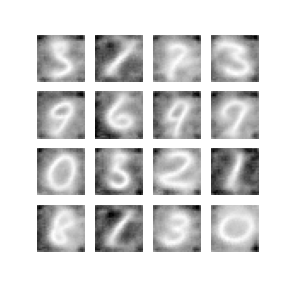

In [229]:
embed.embed_file(anim_file)

In [166]:
for i in range (10, 120, 10):
    r_x = rotate(test_sample, -i)
    mean, logvar = model.encode(test_sample)
    r_m = np.identity(model.latent_dim)
    z = model.reparameterize(mean, logvar)
    theta = np.radians(i)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.decode(rota_z)
    generate_and_save_images(phi_z, i, 'test2')

In [167]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test2/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


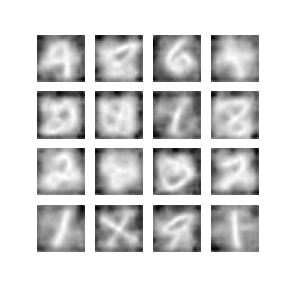

In [168]:
embed.embed_file(anim_file)

In [169]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test_dir1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [171]:
for i in range(2, 6):
    model = CVAE(latent_dim=16, beta=i)
    checkpoint = tf.train.Checkpoint(model=model)
    checkpoint.restore("checkpoints/2_22/method" + str(i) + "/ckpt-10")
    mean, logvar = model.encode(test_sample)
    r_m = np.identity(model.latent_dim)
    z = model.reparameterize(mean, logvar)
    for j in range(10, 120, 10):
        theta = np.radians(j)
        c, s = np.cos(theta), np.sin(theta)
        r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
        rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
        phi_z = model.decode(rota_z)
        generate_and_save_images(phi_z, j, 'test3' + "/beta_test" + str(i))

In [182]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test3/beta_test3/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


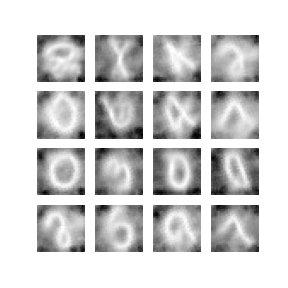

In [183]:
embed.embed_file(anim_file)

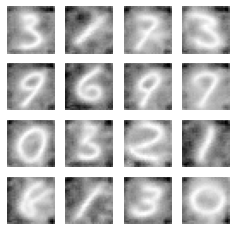

In [234]:
test = rotate(test_sample, 50)
mean, logvar = model.encode(test)
z = model.reparameterize(mean, logvar)
predictions = model.decode(z)
generate_images(model, predictions)

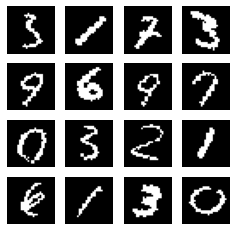

In [235]:
generate_images(model, test)

In [258]:
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, 32])

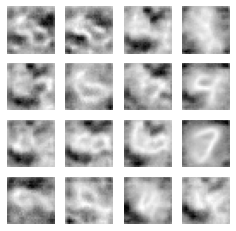

In [259]:
predictions = model.decode(random_vector_for_generation)
generate_images(model, predictions)

In [274]:
from itertools import product
z_shape = z.shape
#     indices = list(range(z_shape[1])) * z_shape[0]
#     swap_index_pair = np.random.randint(0, latent_dim, size=(z_shape[0], 2), dtype=np.int32)
indices = list(range(z_shape[1]))
swap_index_pair = np.random.choice(indices, size=32, replace=False)
tmp = indices[swap_index_pair[0]]
indices[swap_index_pair[0]] = indices[swap_index_pair[1]]
indices[swap_index_pair[1]] = tmp
for i in range(len(swap_index_pair)):
         tmp = indices[swap_index_pair[i, 0]]
         indices[swap_index_pair[i, 1]] = indices[swap_index_pair[i, 0]]
         indices[swap_index_pair[i, 1]] = tmp
nd_indices = [
    [i, j] for i, j in product(range(z_shape[0]), indices)
]
    
z_shuffled = tf.reshape(tf.gather_nd(z, tf.convert_to_tensor(nd_indices)), z_shape)

SyntaxError: invalid syntax (<ipython-input-274-e25a6c931872>, line 9)

In [272]:
z.shape

TensorShape([16, 32])

In [282]:
z.numpy()[: 1].mean()

0.1981803

In [290]:
print(type(z))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [296]:
swap_index_pair = np.random.choice(32, size=, replace=False) 

In [293]:
indices = list(range(32))

In [294]:
indices[swap_index_pair[0]]

0

In [324]:
swap_index = np.random.choice(32, size=32, replace=False)

In [325]:
nd_indices = [[i, j] for i, j in product(range(z_shape[0]), swap_index)]

In [314]:
tf.reshape(tf.gather_nd(z, tf.convert_to_tensor(nd_indices)), z_shape)[1,:].numpy().mean()

0.15480328

In [330]:
def permuted(z):
    z_shape = z.shape
#     indices = list(range(z_shape[1])) * z_shape[0]
#     swap_index_pair = np.random.randint(0, latent_dim, size=(z_shape[0], 2), dtype=np.int32)
    indices = list(range(z_shape[1]))
    swap_index = np.random.choice(indices, size=z_shape[1], replace=False)
    nd_indices = [
            [i, j] for i, j in product(range(z_shape[0]), swap_index)
        ]
        
    z_shuffled = tf.reshape(tf.gather_nd(z, tf.convert_to_tensor(nd_indices)), z_shape)
    return z_shuffled

In [334]:
permuted(z)[:, 14]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 1.1467485 ,  1.2078764 , -0.34351712, -0.19138749, -0.815067  ,
        0.36830568,  0.36747363, -0.05924398, -0.18201831,  0.8598826 ,
        0.9267385 , -0.9473185 ,  0.82690966, -1.6203778 , -0.5570452 ,
       -0.6232705 ], dtype=float32)>

In [336]:
z[:, 2]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 1.1467485 ,  1.2078764 , -0.34351712, -0.19138749, -0.815067  ,
        0.36830568,  0.36747363, -0.05924398, -0.18201831,  0.8598826 ,
        0.9267385 , -0.9473185 ,  0.82690966, -1.6203778 , -0.5570452 ,
       -0.6232705 ], dtype=float32)>

In [329]:
swap_index = np.random.choice(indices, size=indices, replace=False)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [341]:
len(test_images)

10000